In [16]:
import pandas as pd
import numpy as np
from matplotlib import rcParams
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import plotly.express as px

In [17]:
cost = pd.read_parquet(r"..\all_data\main_data_parq\df_cost.parquet")

In [18]:
cost.set_index('date',inplace=True)
cost

,place,product,cost
date,,,
2216-01-02,Анор Лондо,Целебные травы,2.07
2216-01-26,Анор Лондо,Целебные травы,3.07
2216-02-12,Анор Лондо,Целебные травы,3.30
2216-03-06,Анор Лондо,Целебные травы,4.04
2216-03-27,Анор Лондо,Целебные травы,3.88
...,...,...,...
2218-07-29,Фалькония,Эстус,3.10
2218-08-10,Фалькония,Эстус,7.20
2218-08-27,Фалькония,Эстус,3.31


In [19]:
def Pl(cost):
    for places in cost['place'].unique():
        for products in cost['product'].unique():
            al_cost = cost[(cost['product'] == products) & (cost['place'] == places )]
            al_cost.plot( marker='D',figsize=(16,4))

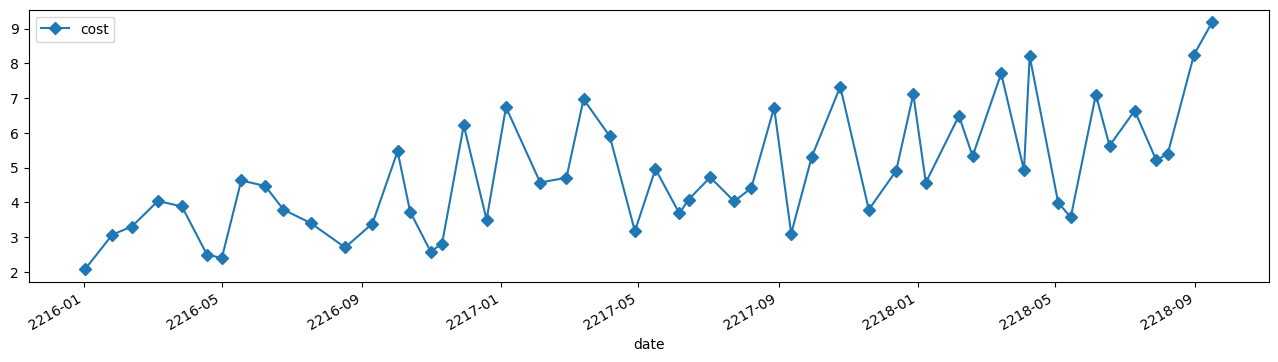

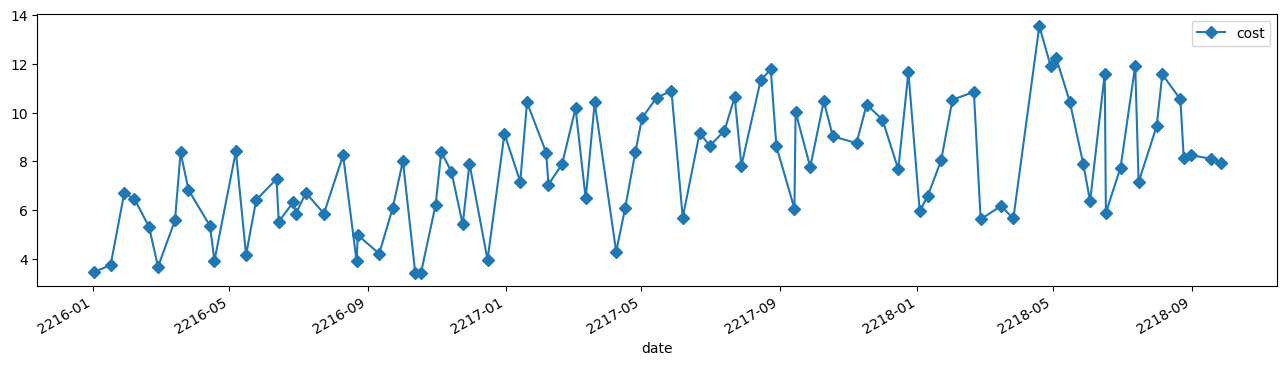

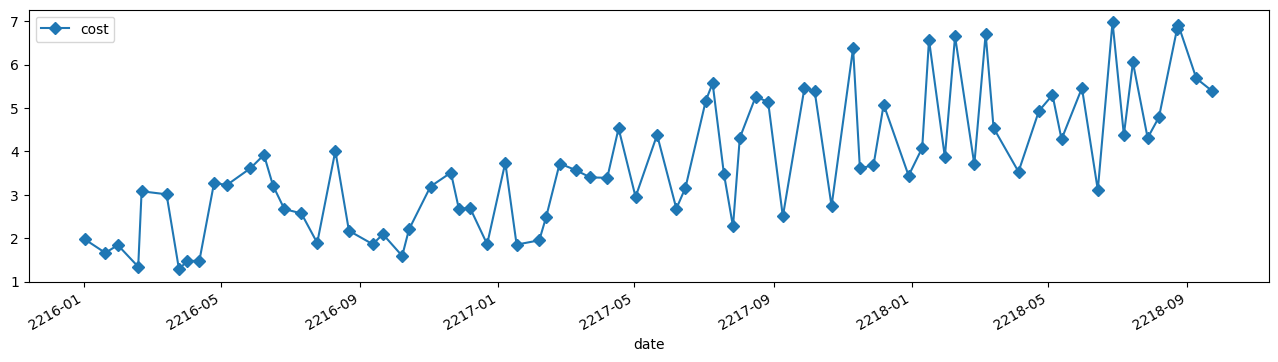

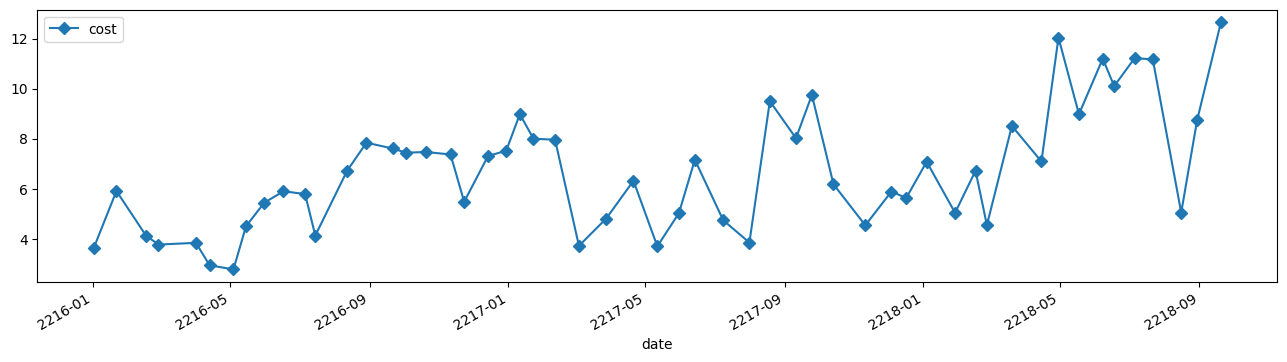

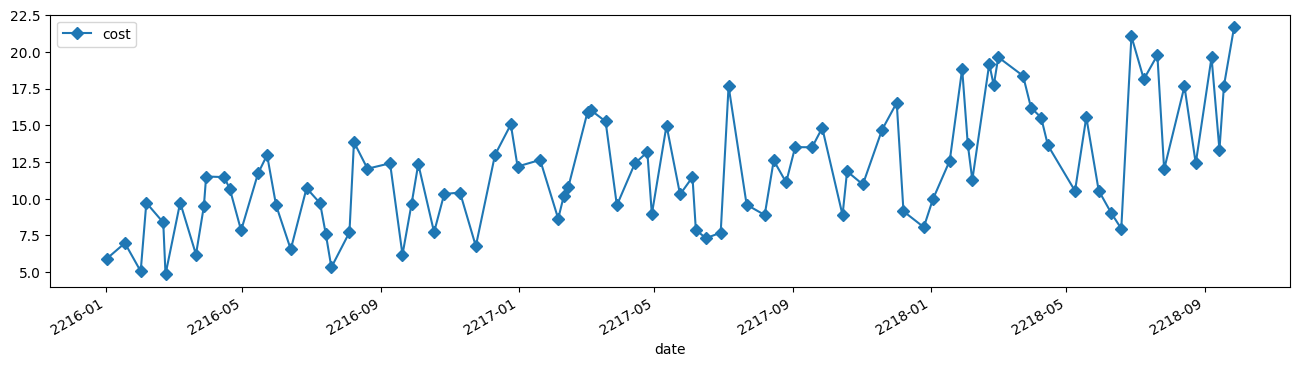

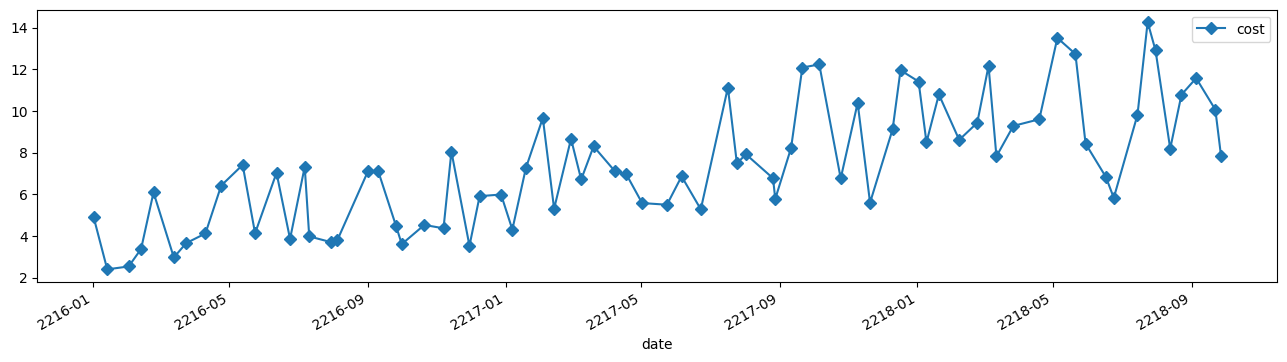

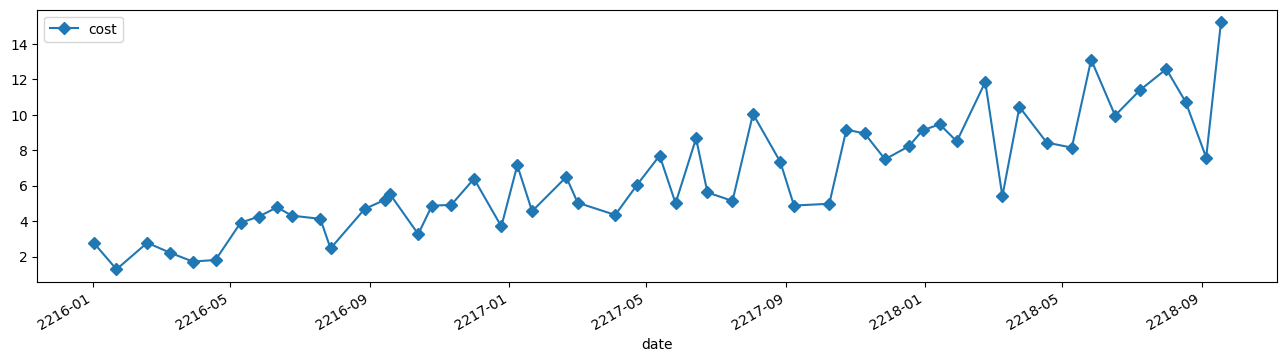

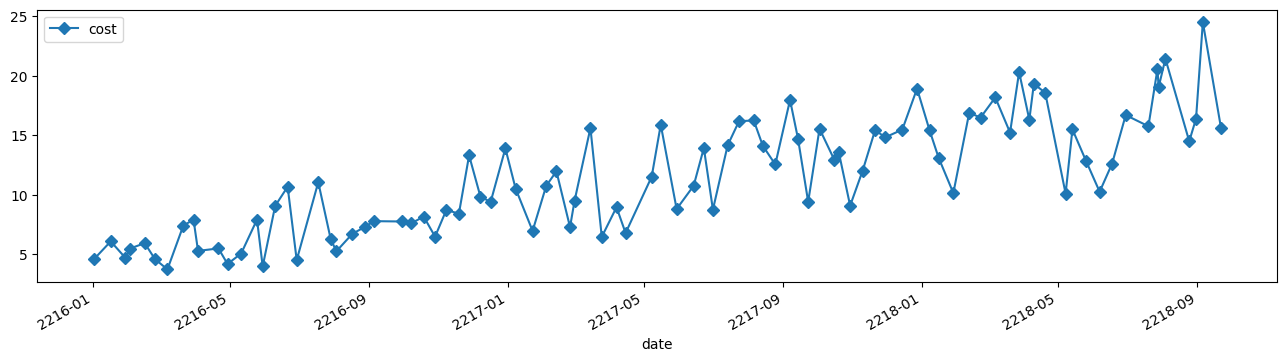

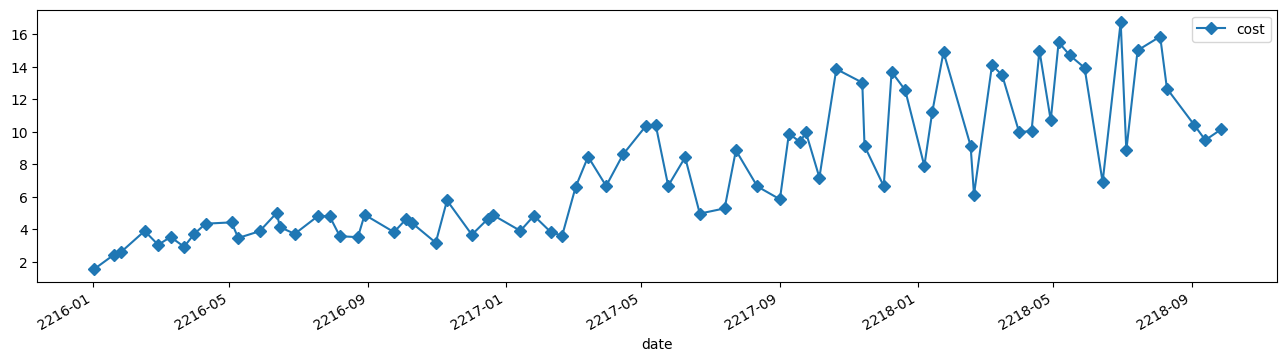

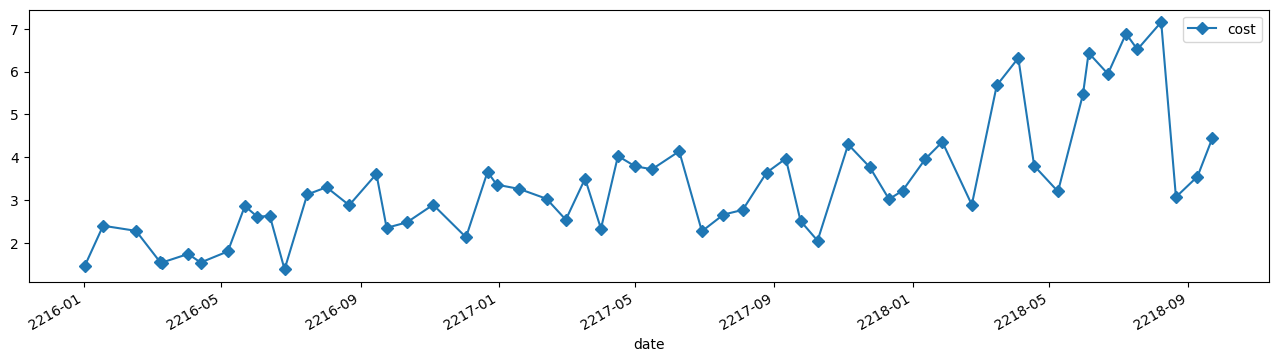

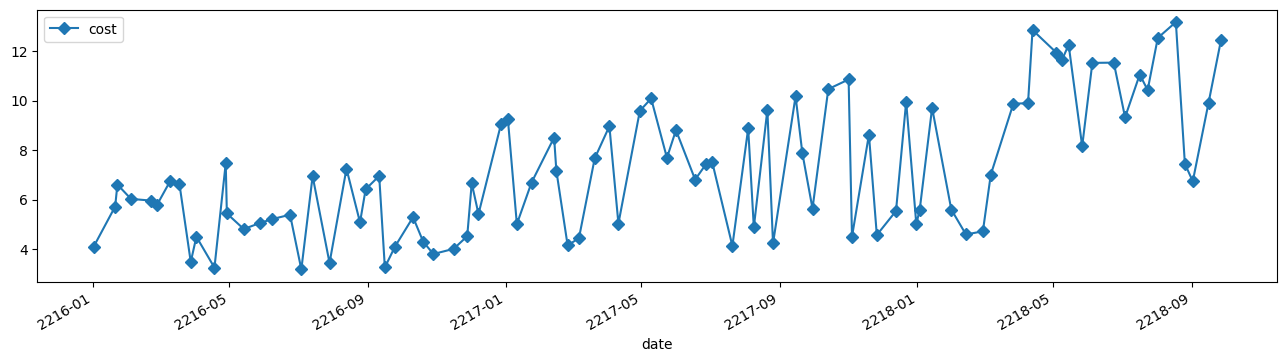

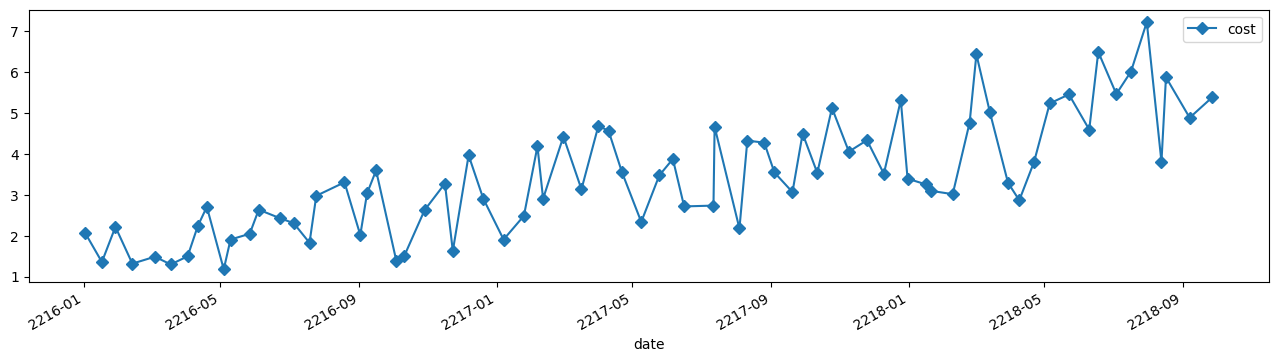

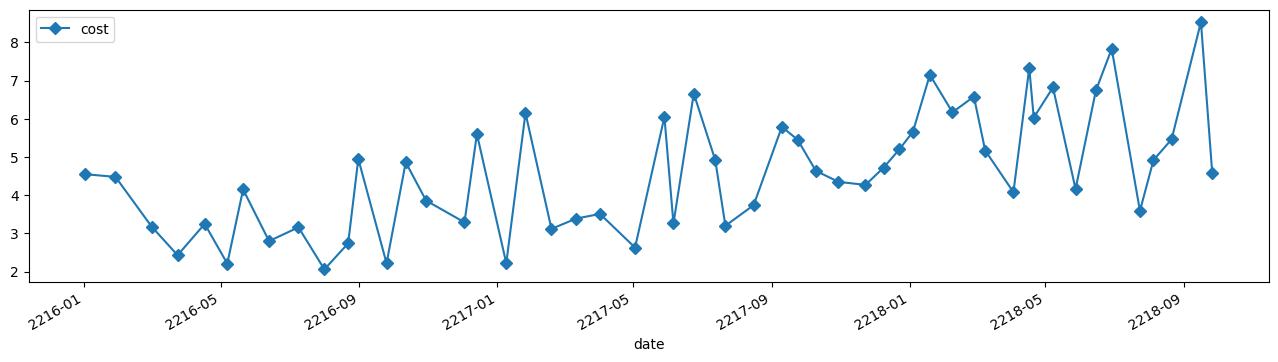

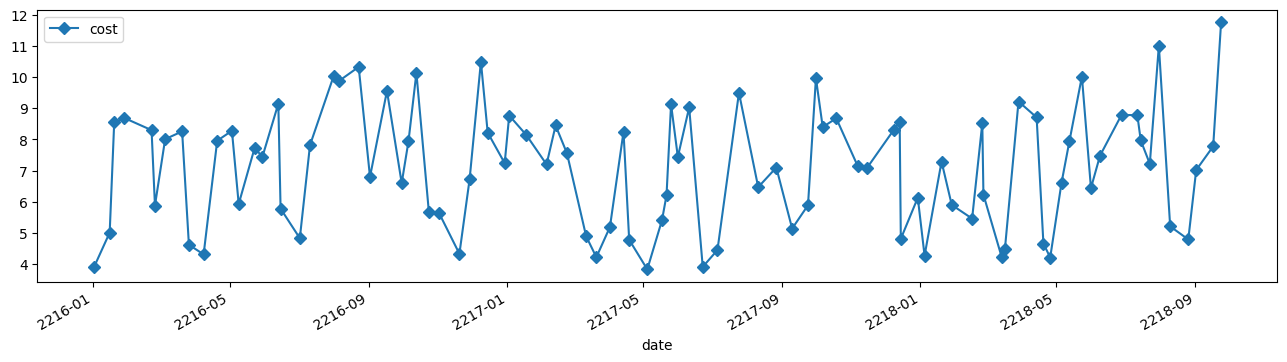

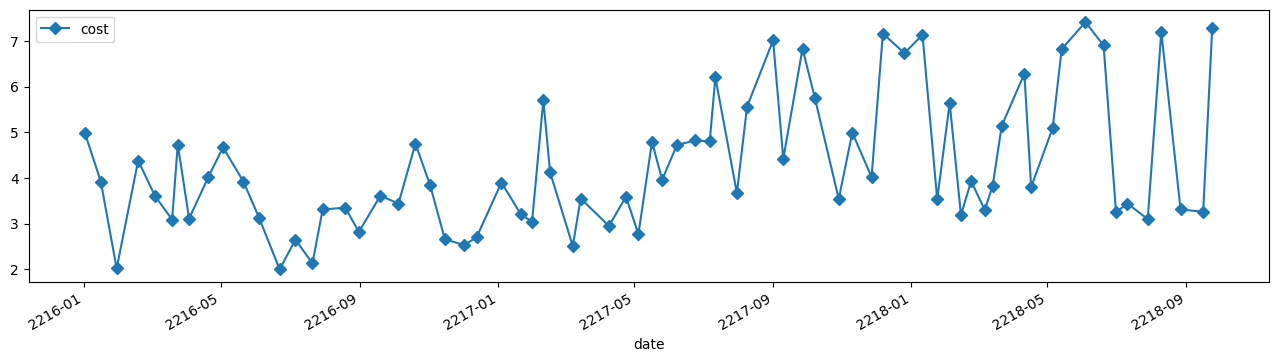

In [20]:
Pl(cost)

Выявить общий тренд в изменении себестоимости производства каждого товара по каждому городу не удалось, поэтому было принято решение усреднить себестоимости каждого месяца и обучить на полученных данных модель.

In [21]:
cost_analyze = pd.read_parquet(r"..\all_data\main_data_parq\df_cost.parquet")

cost_analyze['month'] = cost_analyze.date.dt.strftime('%b')
cost_analyze['year'] = cost_analyze.date.dt.strftime('%Y')
ls = cost_analyze.groupby(["place","product","year",'month'])["cost"].mean().reset_index(name='mean_of_cost')
for places in cost['place'].unique():
    for products in cost['product'].unique():
        al_cost = ls[(ls['product'] == products) & (ls['place'] == places )]
        print(f"{places}, {products}", len(al_cost))

Анор Лондо, Целебные травы 33
Анор Лондо, Эльфийская пыльца 33
Анор Лондо, Эстус 33
Врата Балдура, Целебные травы 32
Врата Балдура, Эльфийская пыльца 33
Врата Балдура, Эстус 33
Кеджистан, Целебные травы 33
Кеджистан, Эльфийская пыльца 33
Кеджистан, Эстус 33
Нокрон, Целебные травы 33
Нокрон, Эльфийская пыльца 33
Нокрон, Эстус 33
Фалькония, Целебные травы 31
Фалькония, Эльфийская пыльца 33
Фалькония, Эстус 33


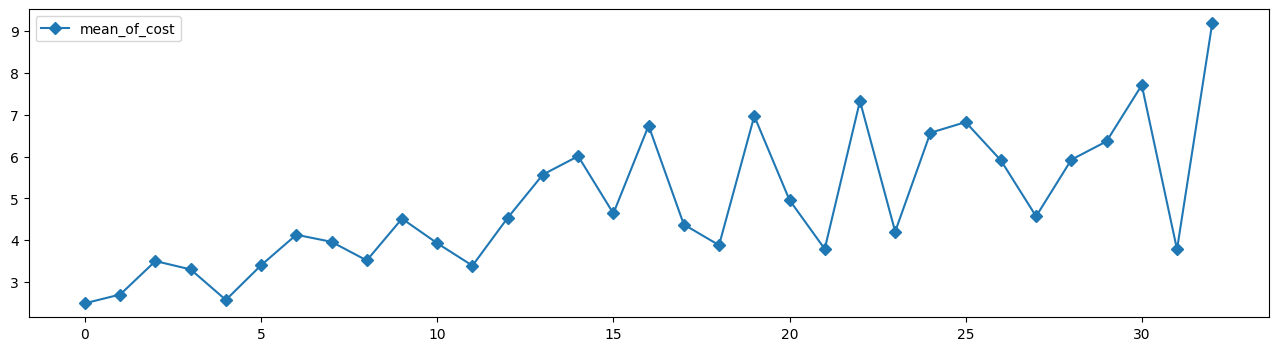

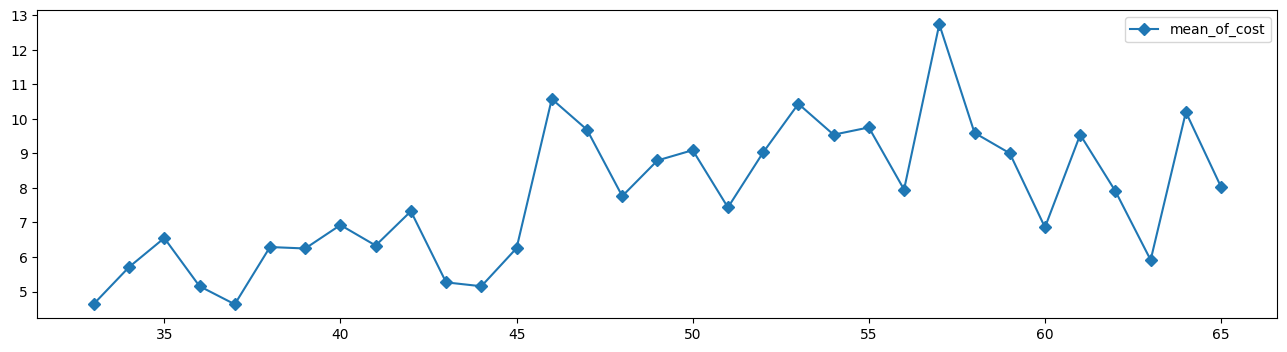

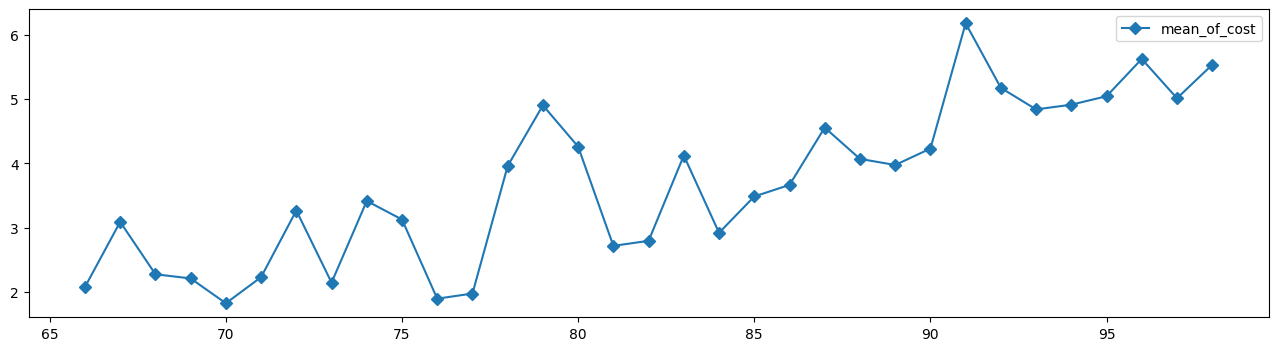

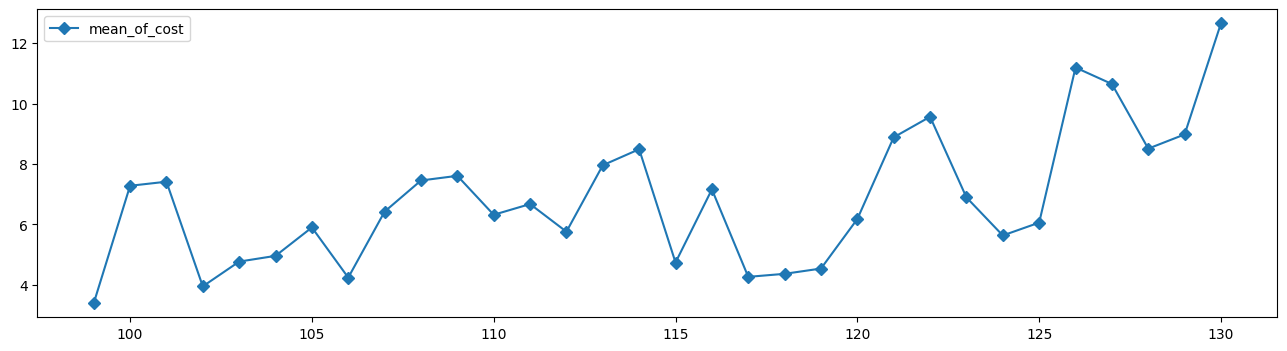

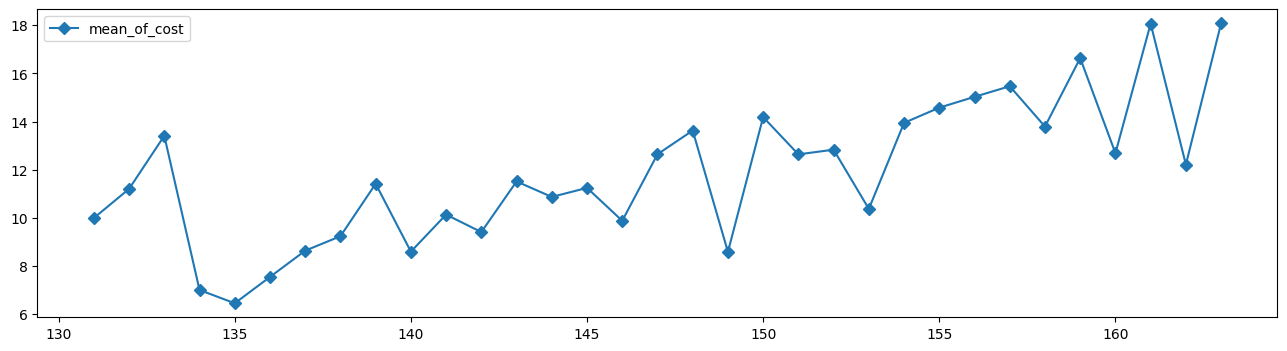

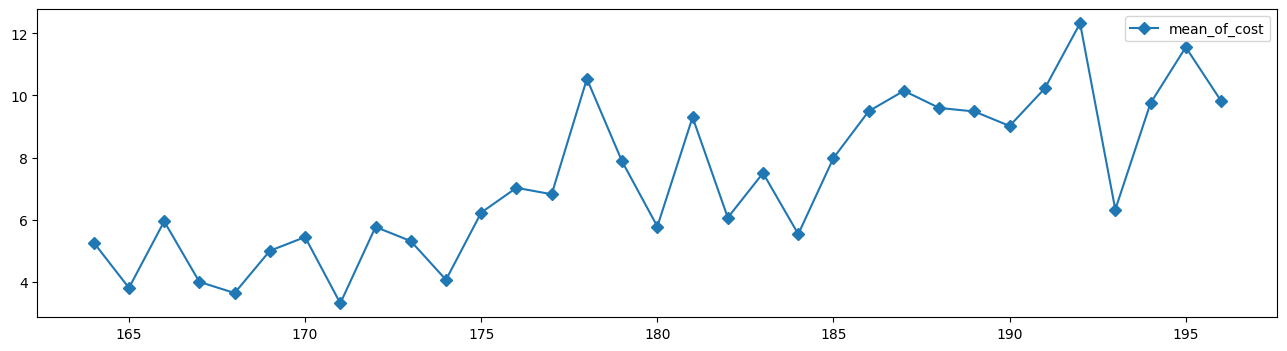

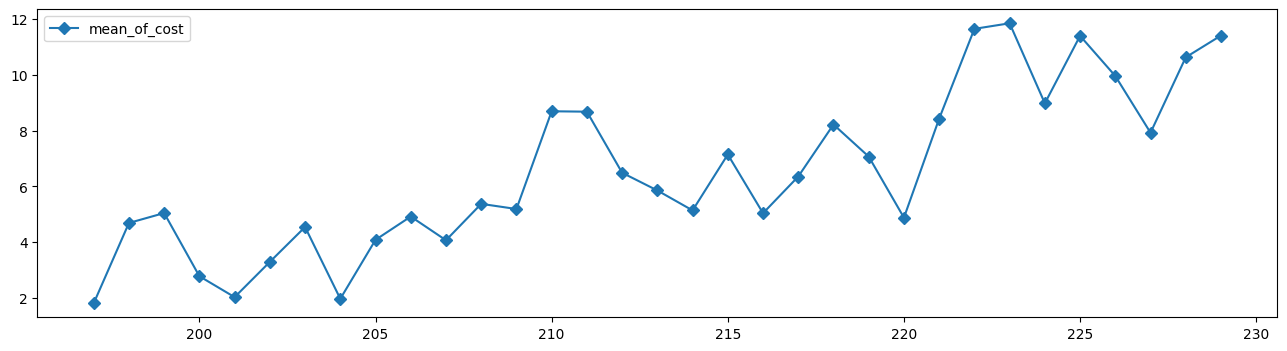

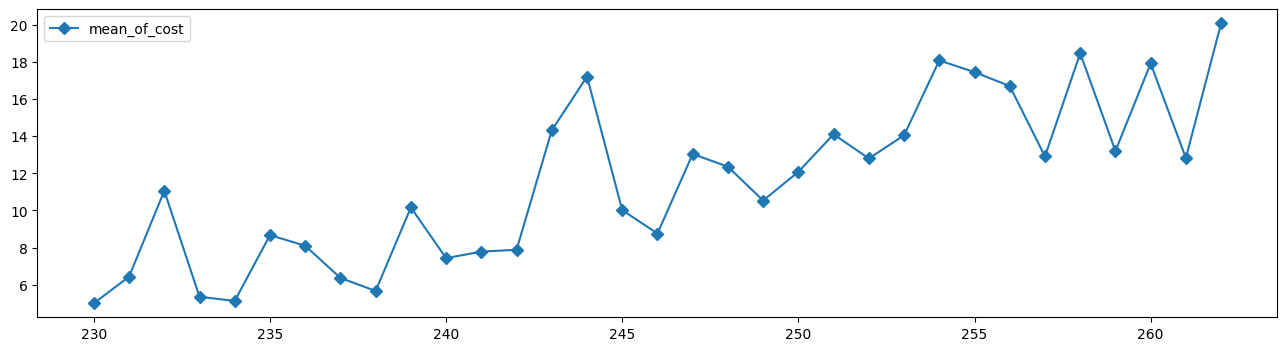

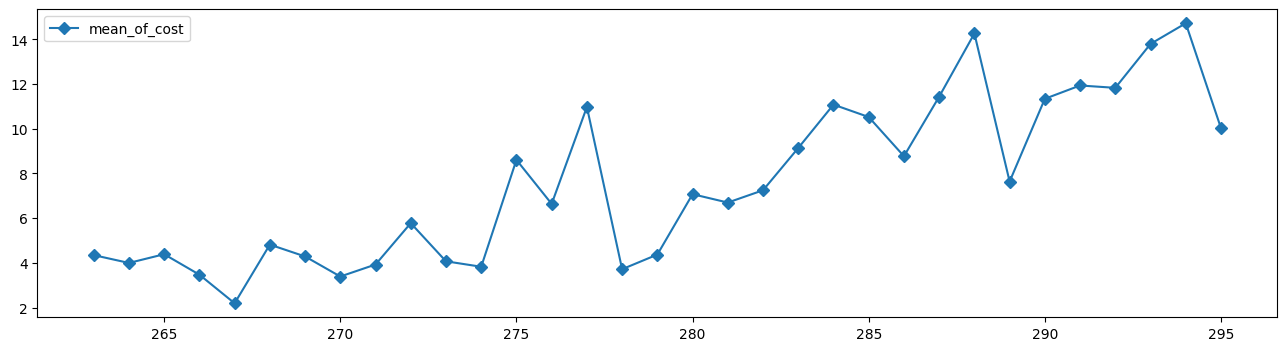

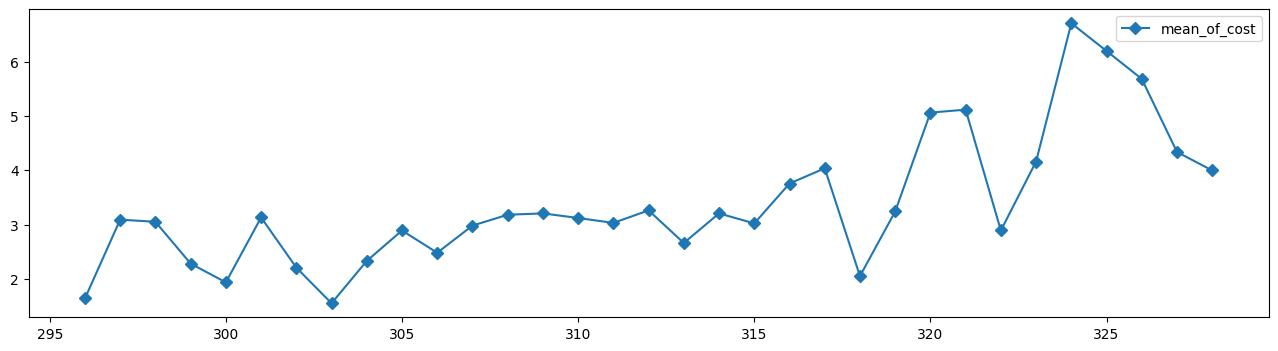

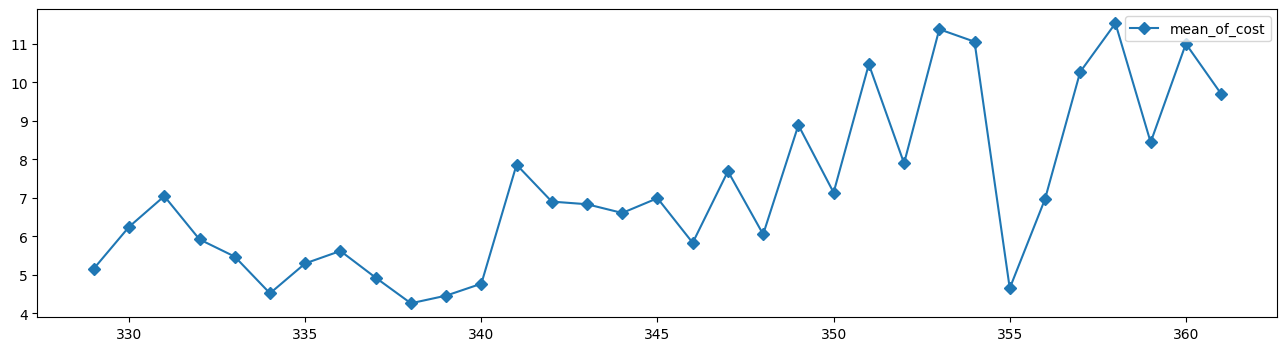

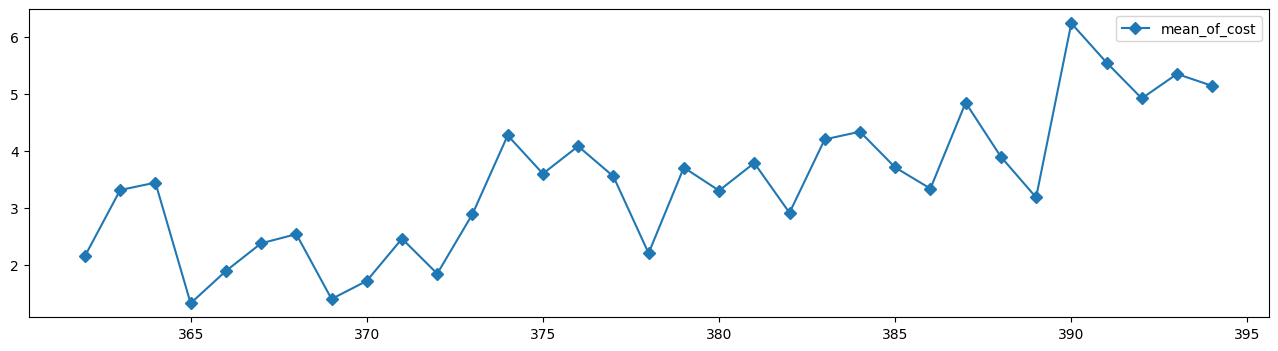

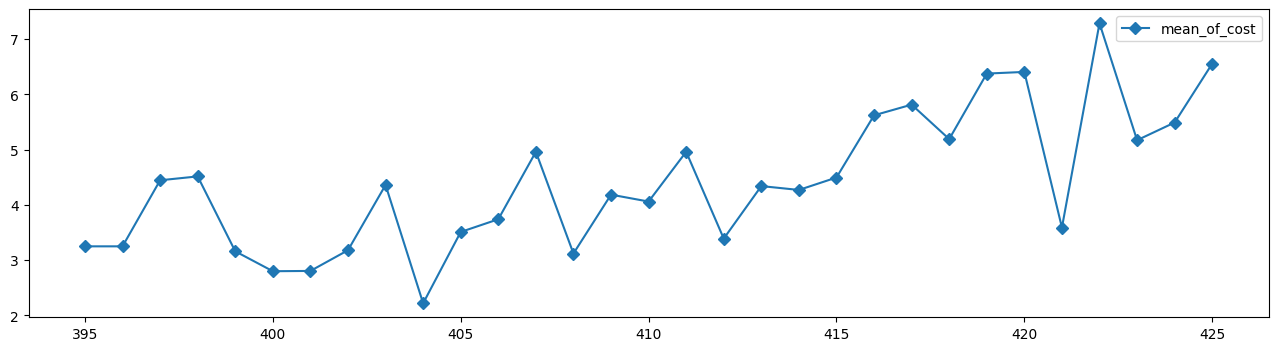

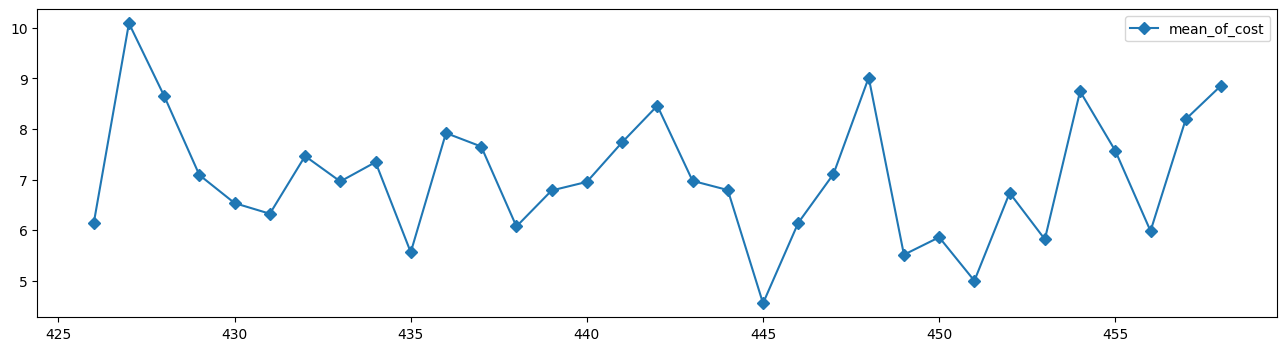

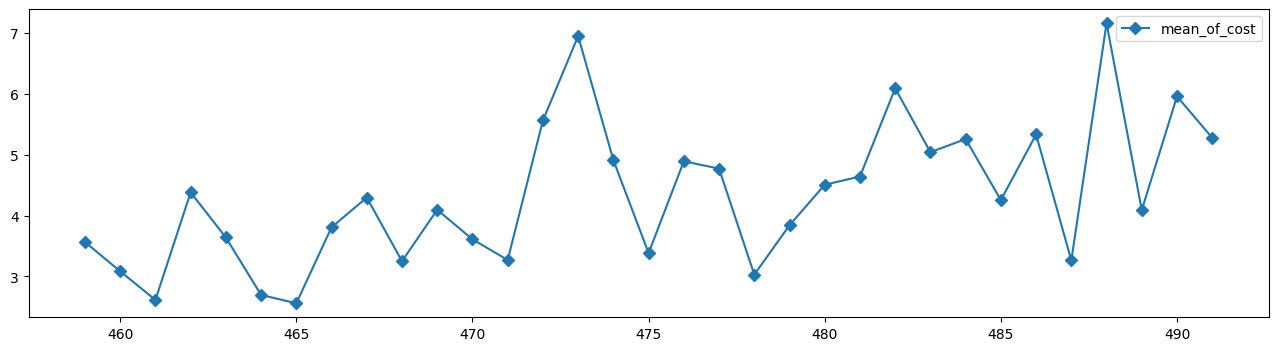

In [22]:
Pl(ls)

# Обучение модели прогнозирования cost

In [23]:
data1 = ls.copy()
encoded_place= pd.get_dummies(data1['place'],prefix = 'place', drop_first=False).astype('int')
encoded_product = pd.get_dummies(data1['product'],prefix = 'product', drop_first=False).astype('int')
encoded_month = pd.get_dummies(data1['month'],prefix = 'month', drop_first=False).astype('int')
encoded_year = pd.get_dummies(data1['year'],prefix = 'year', drop_first=False).astype('int')
dataer = pd.concat([ls,encoded_product,encoded_place,encoded_month,encoded_year], axis=1)
dataer.drop(columns=['place', 'product','month',"year"], inplace=True)

In [24]:
dataer

,mean_of_cost,product_Целебные травы,product_Эльфийская пыльца,product_Эстус,place_Анор Лондо,place_Врата Балдура,place_Кеджистан,place_Нокрон,place_Фалькония,month_Apr,...,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,year_2216,year_2217,year_2218
0,2.490000,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,2.700000,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3.500000,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3.300000,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.570000,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,3.263333,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
488,7.155000,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
489,4.090000,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
490,5.955000,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [25]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
X_train, X_test,y_train, y_test = train_test_split(dataer.loc[:,~dataer.columns.isin(['mean_of_cost'])],
                                                   dataer['mean_of_cost'],
                                                   test_size = 0.3,
                                                   random_state=42)
params = {'learning_rate': 0.1,
 'n_estimators': 400,
'num_leaves': 12,
'verbose':-1}

params = {
 'iterations': 20,
 'learning_rate': 0.05,
 'n_estimators': 300,
         'verbose':-1}
lgbm = LGBMRegressor(random_state = 42,**params)
reg = lgbm.fit(X_train, y_train)
print(reg.score(X_test, y_test))

pred = lgbm.predict(X_test)
pred_train = lgbm.predict(X_train)
n_scores = cross_val_score(lgbm, X_train, y_train,
                           cv=10, n_jobs=-1,error_score='raise')
print(n_scores.mean())
print(r2_score(y_test,pred))
print(r2_score(y_train,pred_train))
mean_absolute_error(pred,y_test)
mean_squared_error(pred,y_test)

0.8182778461375323
0.8050881940582523
0.8182778461375323
0.8895329973045776


1.8726289055498133

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = param_grid = {
    'learning_rate': [0.1,0.05],
'max_depth': [2,10, None],
'iterations':[20, 15,30,100,200, None],
    'n_estimators': [400,100,300, None]
}
gr = GridSearchCV(lgbm,
                 param_grid =param_grid,
                 cv = 10)
gr.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
gr.best_params_

{'iterations': 20,
 'learning_rate': 0.05,
 'max_depth': None,
 'n_estimators': 400}

In [ ]:
feature_imp = pd.Series(lgbm.feature_importances_,index=list(X_train.columns)).sort_values(ascending=False)
feature_imp

year_2216                    551
product_Эльфийская пыльца    432
product_Целебные травы       363
place_Кеджистан              303
place_Врата Балдура          275
year_2218                    196
year_2217                    184
place_Нокрон                 180
place_Фалькония              128
month_Dec                    102
place_Анор Лондо              95
month_Jan                     88
month_Sep                     85
product_Эстус                 69
month_Feb                     69
month_Apr                     68
month_Mar                     60
month_Aug                     31
month_Jun                     30
month_May                     27
month_Oct                     24
month_Jul                      5
month_Nov                      0
dtype: int32